In [14]:
# S1.1: Import the 'numpy', 'pandas' & 'matplotlib.pyplot' modules. Create a Pandas DataFrame. Display the first 5 rows of the DataFrame.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

met_df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv')
met_df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [9]:
met_df.shape

(45716, 10)

In [10]:
met_df['year'].describe()

count    45428.000000
mean      1991.772189
std         27.181247
min        301.000000
25%       1987.000000
50%       1998.000000
75%       2003.000000
max       2501.000000
Name: year, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


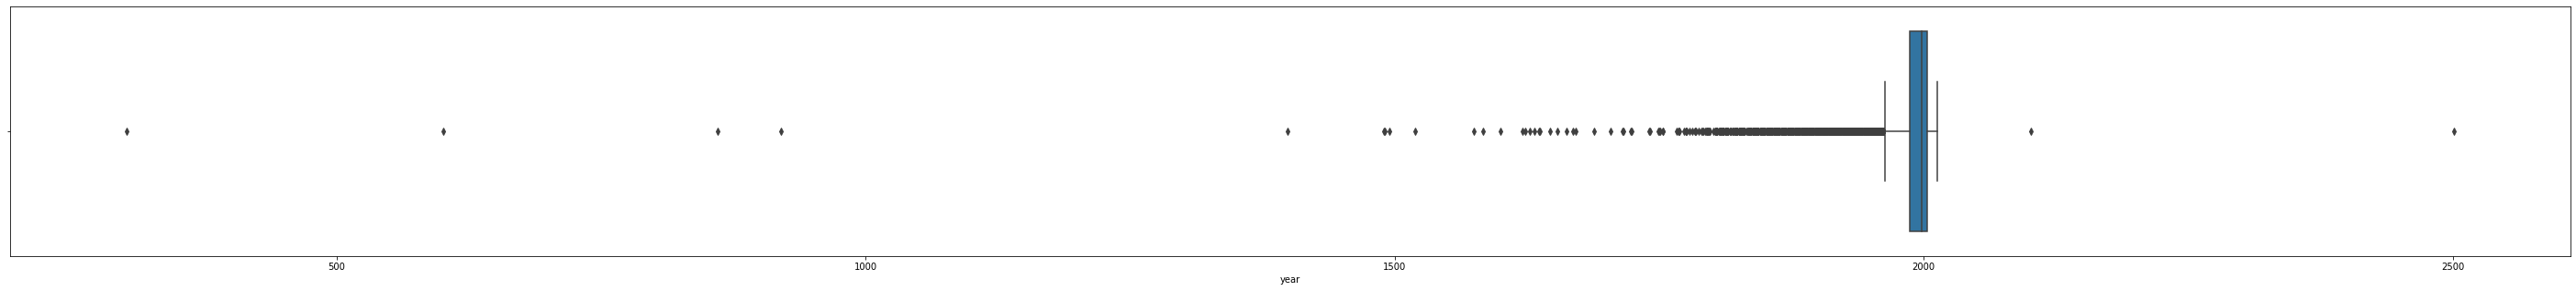

In [11]:
plt.figure(figsize=(50,5))
sns.boxplot(met_df['year'])
plt.show()

As you can see, the boxplot for the year column in the met_df DataFrame is tightly squeezed. It shows that most of the year values are very close to each other. Specifically, most of the year values are roughly around the year 2000.

**The Dataset Variables**

The dataset contains the following variables:

**name:** The name of the place where a meteorite was found or observed.

**id:** A unique identifier for a meteorite.

**nametype:** One of the following:

**valid:** A typical meteorite.

**relict:** A meteorite that has been highly degraded by the weather on Earth.

**recclass:** The class of the meteorite; one of a large number of classes based on physical, chemical, and other characteristics.

**mass:** The mass of the meteorite, in grams.

**fall:** Whether the meteorite was seen falling, or was discovered after its impact; one of the following:

**Fell:** The meteorite's fall was observed.

**Found:** The meteorite's fall was not observed.

**year:** The year the meteorite fell, or the year it was found (depending on the value of fell).

**reclat:** The latitude of the meteorite's landing.

**reclong:** The longitude of the meteorite's landing.

**GeoLocation:** A parentheses-enclose, comma-separated tuple that combines reclat and reclong.

In [15]:

warnings.filterwarnings("ignore")

met_df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv')

# 2. Find the number of rows and columns in the DataFrame. 
print(met_df.shape)

# 3. Rows containing the year values less than 860 and greater than 2016.
correct_years_df = met_df[(met_df['year'] >= 860) & (met_df['year'] <= 2016)]

# 4. Rows having the 'reclong' values greater than or equal to -180 degrees and less than or equal to 180 degrees.
correct_long_df = correct_years_df[(correct_years_df['reclong'] >= -180) & (correct_years_df['reclong'] <= 180)]

# 5. Rows containing the '0 reclat' and '0 reclong' values from the 'correct_long_df'.
correct_lat_long_df = correct_long_df[~((correct_long_df['reclat'] == 0 ) & (correct_long_df['reclong'] == 0))]

# 6. Indices of the rows having missing mass values.
row_indices = correct_lat_long_df[correct_lat_long_df['mass'].isnull() == True].index

# 7. Missing values in the 'mass' column in the 'correct_lat_long_df' DataFrame with median of mass.
median_mass = correct_lat_long_df['mass'].median()
correct_lat_long_df.loc[row_indices, 'mass'] = median_mass

# 8. Convert the 'year' values into an integer type values.
correct_lat_long_df.loc[:, 'year'] = correct_lat_long_df.loc[:, 'year'].astype('int')

(45716, 10)


**Count** **Plots**

Count plots of meteorites fallen in the years after 1990.
Hue set as 'fall' 

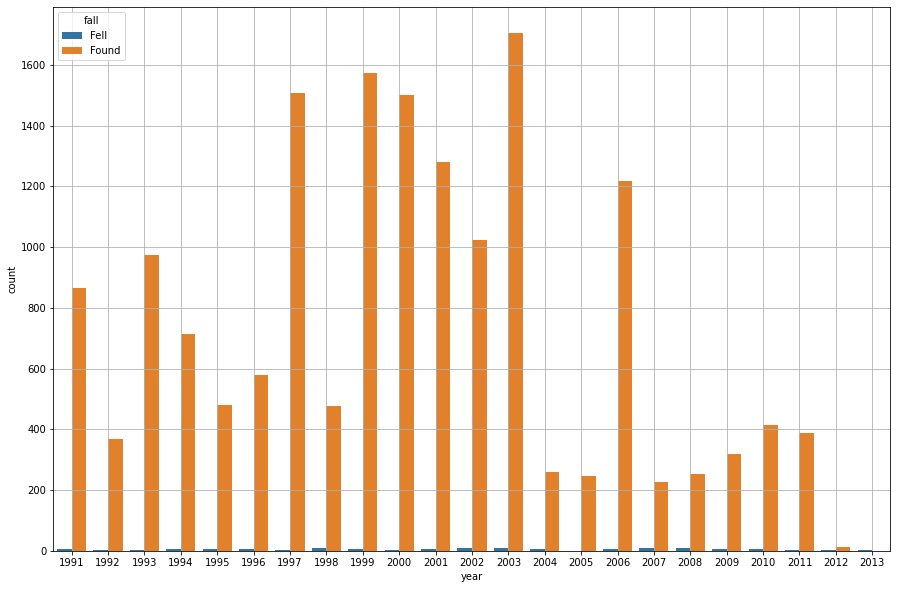

In [17]:
met_after_1990_df = correct_lat_long_df[correct_lat_long_df['year'] > 1990]
plt.figure(figsize=(15,10))
sns.countplot(x='year',data = met_after_1990_df , hue = 'fall')
plt.grid()
plt.show()

As you can see, we have divided the count bars into the count of Fell and the count of Found bars for a year. The blue coloured bars represent the count of the meteorites which fell but were not found in a year whereas the orange coloured bars represent the count of the meteorites which fell but were found in a year. The Fell values are very low in comparison to the Found values. Hence, the blue coloured bars are very short compared to the orange coloured bars.

Count plot of meteorites in the years between 1961 and 1990.
Hue set to 'fall
'

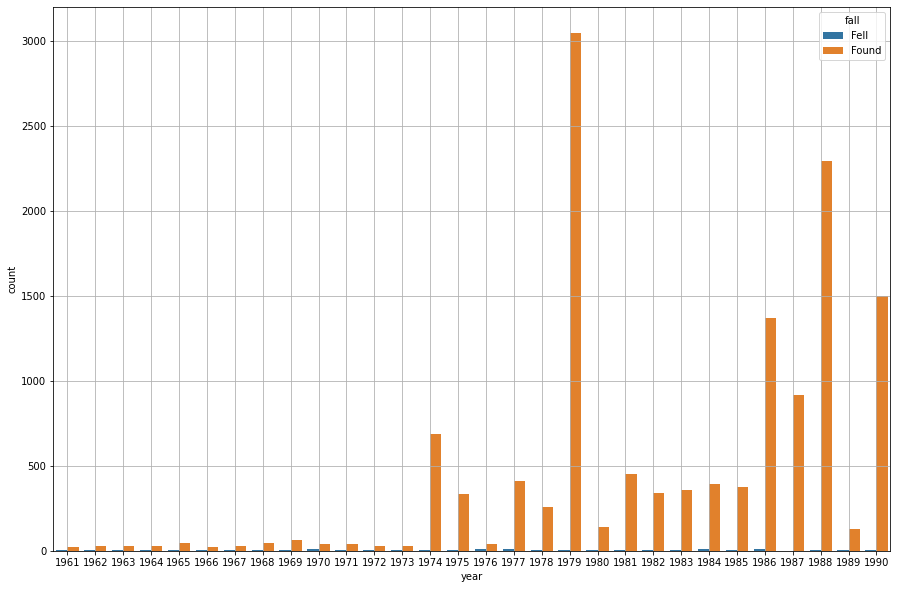

In [18]:
met_1961_1990_df = correct_lat_long_df[(correct_lat_long_df['year'] >= 1961) & (correct_lat_long_df['year'] <= 1990)]
plt.figure(figsize=(15,10))
sns.countplot(x = 'year' , data= met_1961_1990_df , hue = 'fall')
plt.grid()
plt.show()

Again, the Found meteorites are large in numbers for each year.


Count plot of the meteorites fallen in the years between 1921 to 1960.
Hue set to 'fall'.


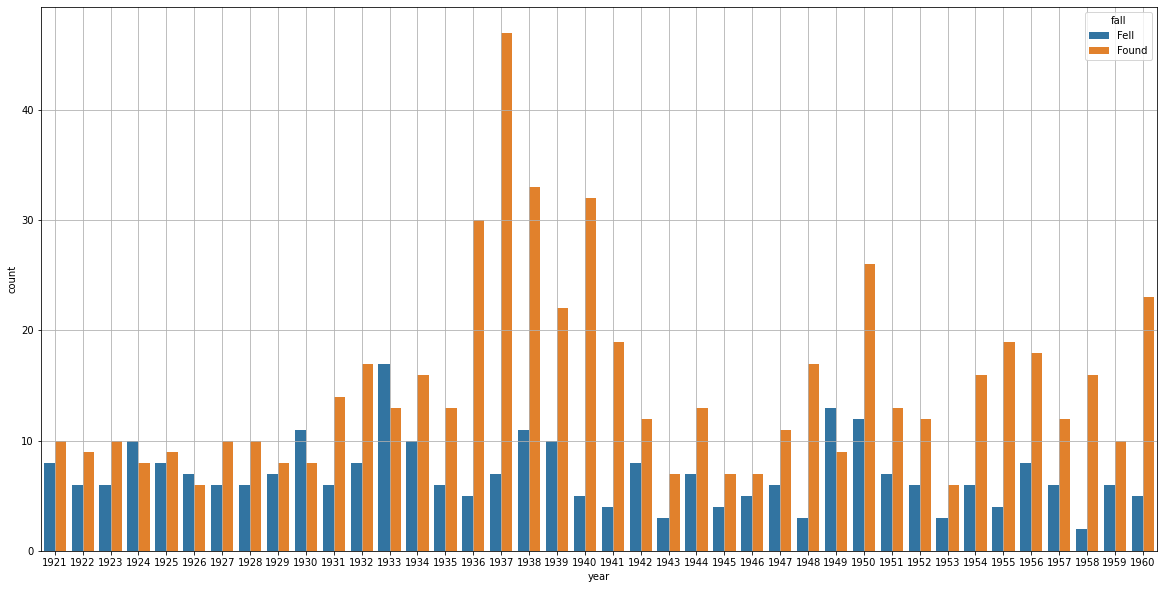

In [19]:
met_1921_1960_df = correct_lat_long_df[(correct_lat_long_df['year'] >= 1921) & (correct_lat_long_df['year'] <= 1960)]
plt.figure(figsize=(20,10))
sns.countplot(x = 'year', data = met_1921_1960_df , hue = 'fall')
plt.grid()
plt.show()

Between 1921 and 1960, the difference between the number of Fell meteorites and Found meteorites for every year is not huge unlike between 1961 and 1990

Count Plot of the meteorites observed befor 1921


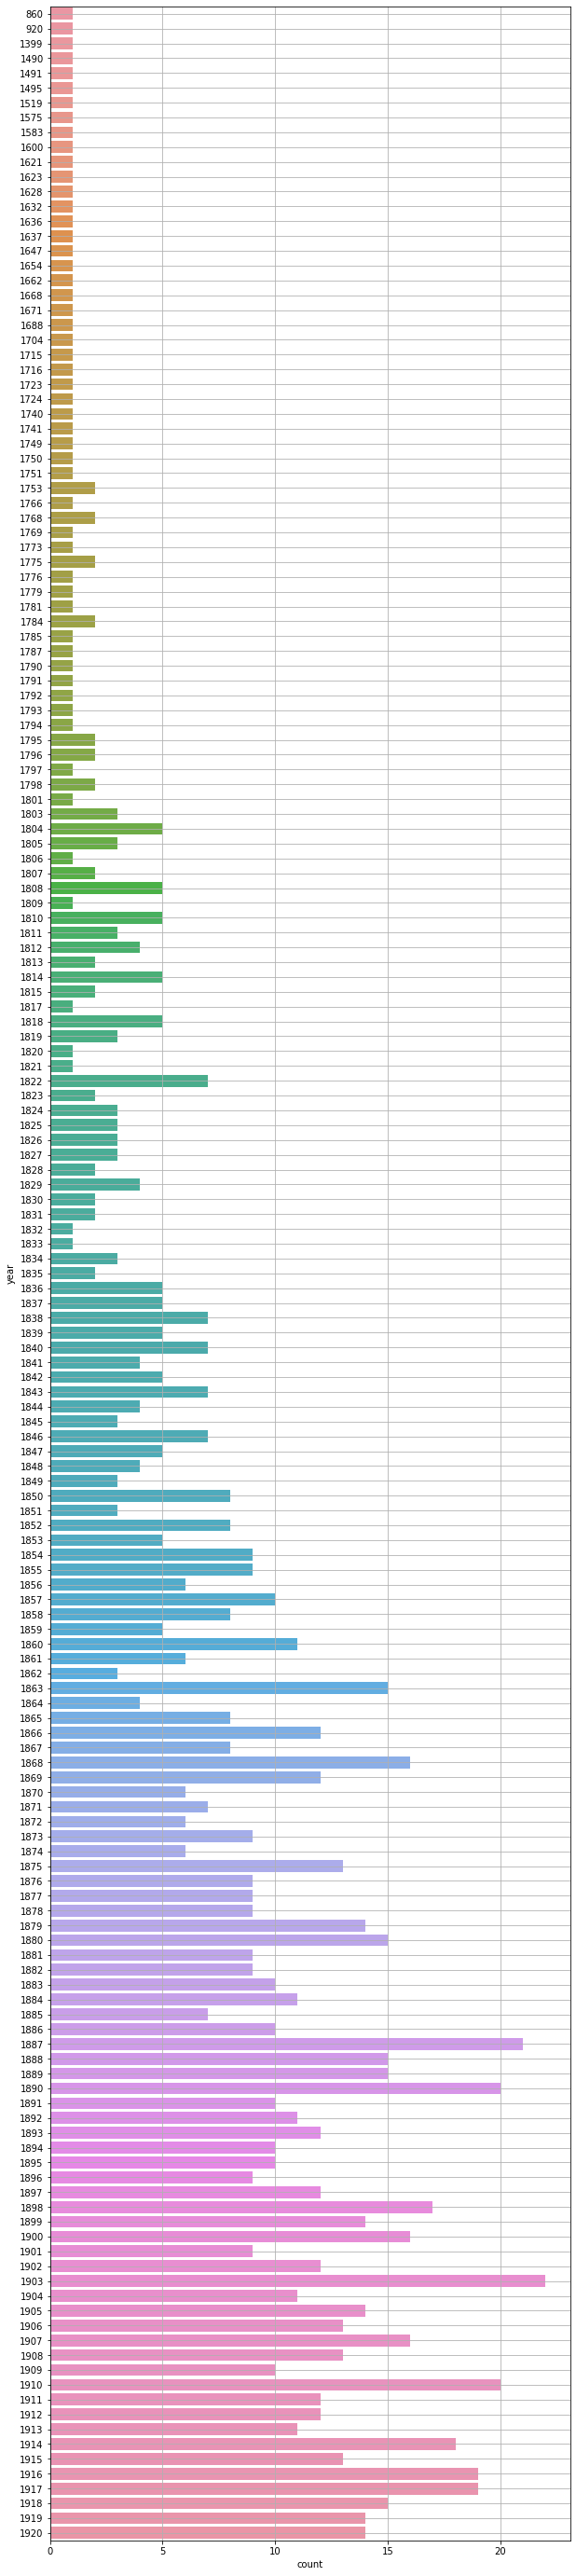

In [25]:
met_before_1921 = correct_lat_long_df[correct_lat_long_df['year'] < 1921]
plt.figure(figsize=(10,50))
sns.countplot(y = 'year' , data = met_before_1921)
plt.grid()
plt.show()

As we can see, the number of meteorites observed before 1921 drops significantly even less than 5

Now, suppose we want to plot a bar graph for the count of the number of meteorites fallen in 5 years between 1970 and 2000. In this case, we will have 6 intervals. They are:

1) 1970 to 1975 (excluding 1975)

2) 1975 to 1980 (excluding 1980)

3) 1980 to 1985 (excluding 1985)

4) 1985 to 1990 (excluding 1990)

5) 1990 to 1995 (excluding 1995)

6) 1995 to 2000 (including 2000)

To create bar graphs for such intervals, we will use a histogram. Let us learn how to create histograms in Python.

Histogram of the meteorites in the range 1970 to 2000

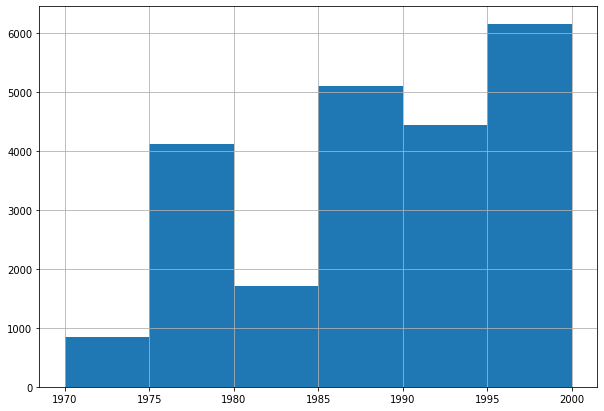

In [26]:
series_1970_2000 = correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] <= 2000) , 'year']
plt.figure(figsize=(10,7))
plt.hist(series_1970_2000 , bins = 6)
plt.grid()
plt.show()

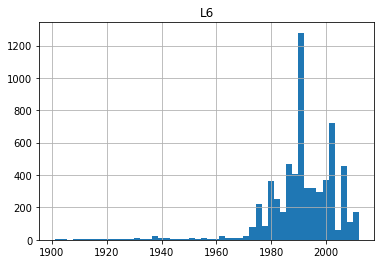

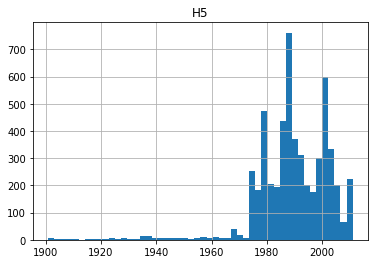

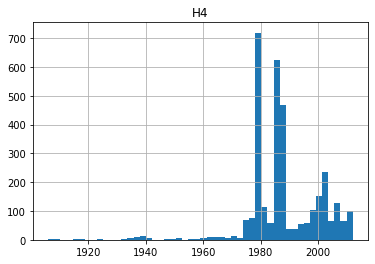

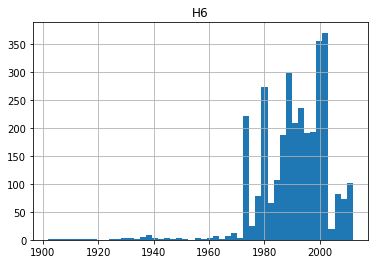

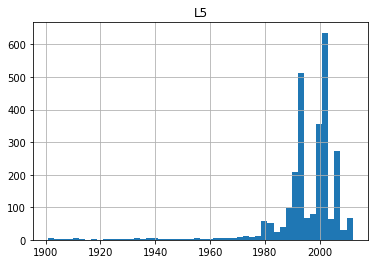

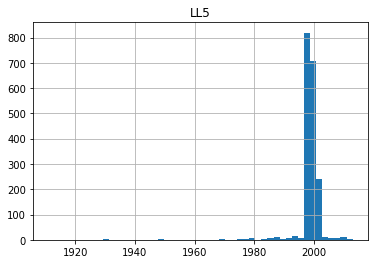

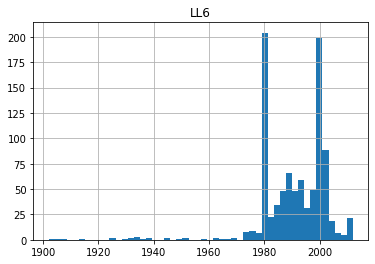

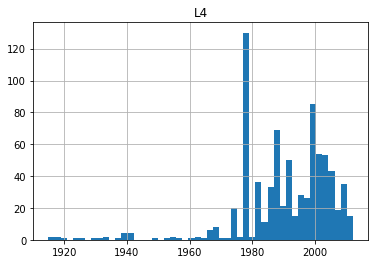

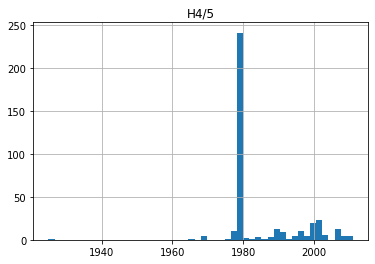

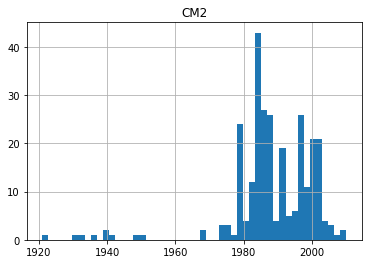

In [28]:
# Histograms for the top 10 most number of fallen meteorite classes using the 'hist()' function.
met_recclass_counts = correct_lat_long_df['recclass'].value_counts()
for cls in met_recclass_counts[:10].index :
  plt.title(cls)
  plt.hist(correct_lat_long_df.loc[(correct_lat_long_df['recclass'] == cls) & (correct_lat_long_df['year'] > 1900) , 'year'] , bins=50)
  plt.grid()
  plt.show()